 # Apps Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from functools import reduce
from datetime import datetime
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as stm
from scipy import stats
from sklearn.preprocessing import OneHotEncoder

Apps_clean = pd.read_csv(r'./Apps_clean.csv')
# Unamed equal previous indexing


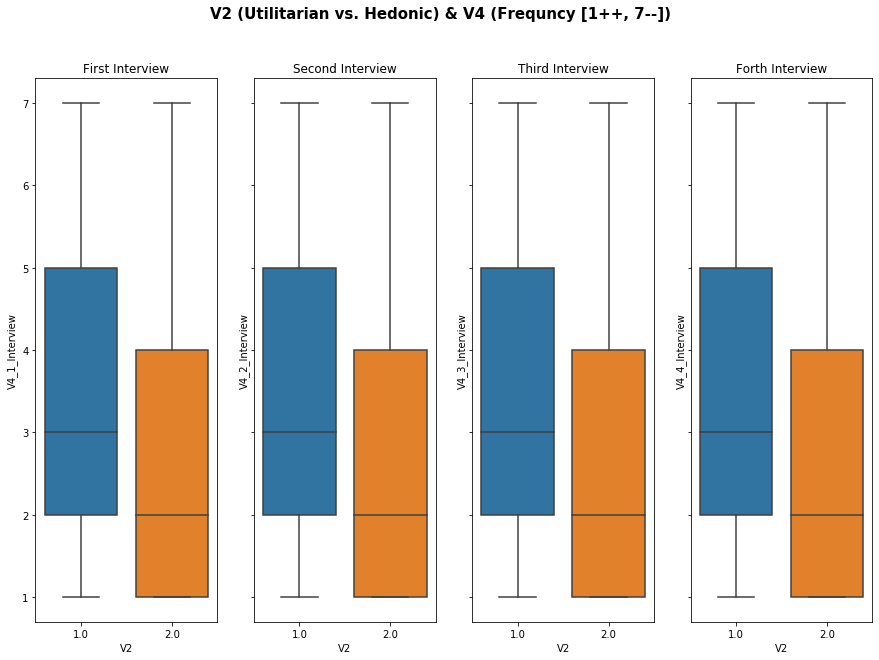

In [2]:
# V2 differences in frequency between utilitarian and hedonic
fig, axs = plt.subplots(nrows=1, ncols=4, sharex=True,
                        sharey=True, figsize=(15, 10))
fig.suptitle('V2 (Utilitarian vs. Hedonic) & V4 (Frequncy [1++, 7--])',
             fontsize=15, fontweight='bold')
sns.boxplot(x='V2', y='V4_1_Interview', data=Apps_clean,
            ax=axs[0])
axs[0].set_title('First Interview')
sns.boxplot(x='V2', y='V4_2_Interview', data=Apps_clean,
            ax=axs[1])
axs[1].set_title('Second Interview')
sns.boxplot(x='V2', y='V4_3_Interview', data=Apps_clean,
            ax=axs[2])
axs[2].set_title('Third Interview')
sns.boxplot(x='V2', y='V4_4_Interview', data=Apps_clean,
            ax=axs[3])
axs[3].set_title('Forth Interview')
fig.subplots_adjust(hspace=0.8)
plt.show()


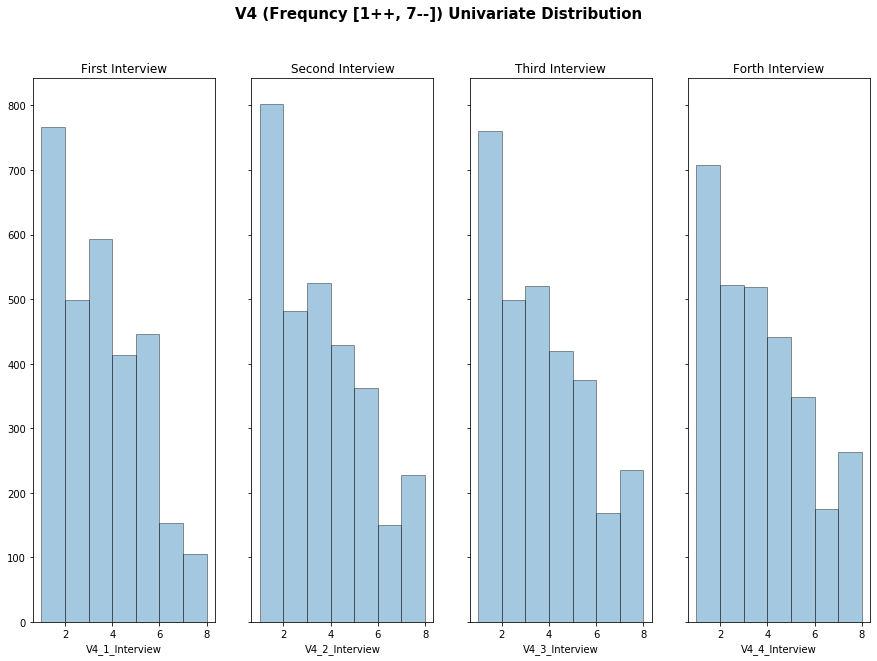

In [3]:
# Dependent variable distribution
fig, axs = plt.subplots(nrows=1, ncols=4, sharex=True,
                        sharey=True, figsize=(15, 10))
fig.suptitle('V4 (Frequncy [1++, 7--]) Univariate Distribution',
             fontsize=15, fontweight='bold')
sns.distplot(Apps_clean['V4_1_Interview'], bins=np.arange(1, 9),
             hist_kws=dict(ec="k"), kde=False, ax=axs[0])
axs[0].set_title('First Interview')
sns.distplot(Apps_clean['V4_2_Interview'], bins=np.arange(1, 9),
             hist_kws=dict(ec="k"), kde=False, ax=axs[1])
axs[1].set_title('Second Interview')
sns.distplot(Apps_clean['V4_3_Interview'], bins=np.arange(1, 9),
             hist_kws=dict(ec="k"), kde=False, ax=axs[2])
axs[2].set_title('Third Interview')
sns.distplot(Apps_clean['V4_4_Interview'], bins=np.arange(1, 9),
             hist_kws=dict(ec="k"), kde=False, ax=axs[3])
axs[3].set_title('Forth Interview')
fig.subplots_adjust(hspace=0.8)
plt.show()


 ### MODEL 1: Linear Regression between V4 and V2

In [4]:
# create a dummy variable
V2_enc = OneHotEncoder(categories='auto', drop='first')
V2_enc = V2_enc.fit(Apps_clean['V2'].values.reshape(-1, 1))
V2_enc.categories_
# 1 if ith apps is hedonic
# 0 if ith apps is utilitarian
# b0 interpreted as the average frequency among utilitarian apps
# b0 + b1 average frequency among hendonic apps
X = V2_enc.transform(Apps_clean['V2'].values.reshape(-1, 1)).toarray()

# Using statsmodels.api

model = stm.OLS(Apps_clean['V4_1_Interview'], stm.add_constant(X)).fit()
# P-values are very low. This indicates that there is statistical
# evidence of a difference in average frequency between V2
# (utilitarian vs. hedonic apps), but it does not explain variance
print(model.summary())


OLS Regression Results                            
Dep. Variable:         V4_1_Interview   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     174.6
Date:                Thu, 10 Oct 2019   Prob (F-statistic):           8.85e-39
Time:                        10:30:20   Log-Likelihood:                -5755.0
No. Observations:                2977   AIC:                         1.151e+04
Df Residuals:                    2975   BIC:                         1.153e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4372      0.042     81.152      0.000       3.354       3.520
x

In [1]:
# Check if they change with the time/they.
# Does not seems the case looking at the graphs
# run Linear Regression models:
for i in ['V4_1_Interview', 'V4_2_Interview',
          'V4_3_Interview', 'V4_4_Interview']:
  model = stm.OLS(Apps_clean[i], stm.add_constant(X)).fit()
  print(model.summary())


NameError: name 'stm' is not defined

 ### MODEL 2: Linear Regression between V4 and V3

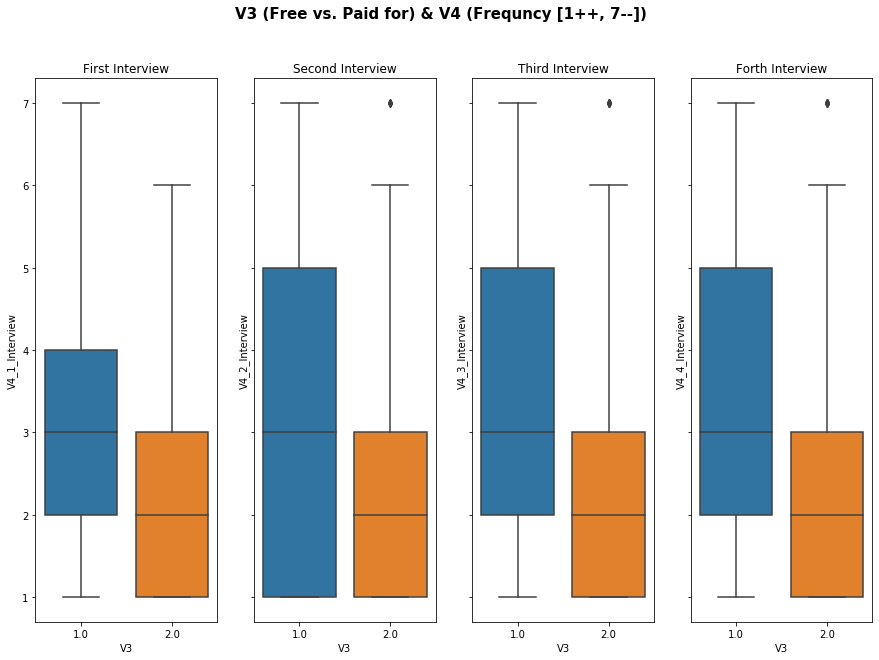

In [6]:
# V3 (free vs paid for)
fig, axs = plt.subplots(nrows=1, ncols=4, sharex=True, 
                        sharey=True, figsize=(15, 10))
fig.suptitle('V3 (Free vs. Paid for) & V4 (Frequncy [1++, 7--])',
             fontsize=15, fontweight='bold')
sns.boxplot(x='V3', y='V4_1_Interview', data=Apps_clean,
            ax=axs[0])
axs[0].set_title('First Interview')
sns.boxplot(x='V3', y='V4_2_Interview', data=Apps_clean,
            ax=axs[1])
axs[1].set_title('Second Interview')
sns.boxplot(x='V3', y='V4_3_Interview', data=Apps_clean,
            ax=axs[2])
axs[2].set_title('Third Interview')
sns.boxplot(x='V3', y='V4_4_Interview', data=Apps_clean,
            ax=axs[3])
axs[3].set_title('Forth Interview')
fig.subplots_adjust(hspace=0.8)
plt.show()


In [7]:
# create a dummy variable
V3_enc = OneHotEncoder(categories='auto', drop='first')
V3_enc = V3_enc.fit(Apps_clean['V3'].values.reshape(-1, 1))
V3_enc.categories_
# 1 if ith apps is paid for
# 0 if ith apps is free
# b0 interpreted as the average frequency among free apps
# b0 + b1 average frequency among paid for apps
del X
X = V3_enc.transform(Apps_clean['V3'].values.reshape(-1, 1)).toarray()

# create the model using statsmodels.api
for i in ['V4_1_Interview', 'V4_2_Interview',
          'V4_3_Interview', 'V4_4_Interview']:
  model = stm.OLS(Apps_clean[i], stm.add_constant(X)).fit()
  print(model.summary())

# p-value is small so there is statistical evidence of a difference
# in average frequency between V3 (free vs paid for apps)
# the relation does not change with time


OLS Regression Results                            
Dep. Variable:         V4_1_Interview   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     40.68
Date:                Thu, 10 Oct 2019   Prob (F-statistic):           2.07e-10
Time:                        10:30:22   Log-Likelihood:                -5819.7
No. Observations:                2977   AIC:                         1.164e+04
Df Residuals:                    2975   BIC:                         1.166e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0987      0.032     96.199      0.000       3.036       3.162
x

 ### MODEL 3: Linear Regression between V4 and V6

In [8]:
pd.value_counts(Apps_clean['V6_2_Interview'])


8.0     590
10.0    496
7.0     415
9.0     336
5.0     321
6.0     274
1.0     184
4.0     134
3.0     130
2.0      97
Name: V6_2_Interview, dtype: int64

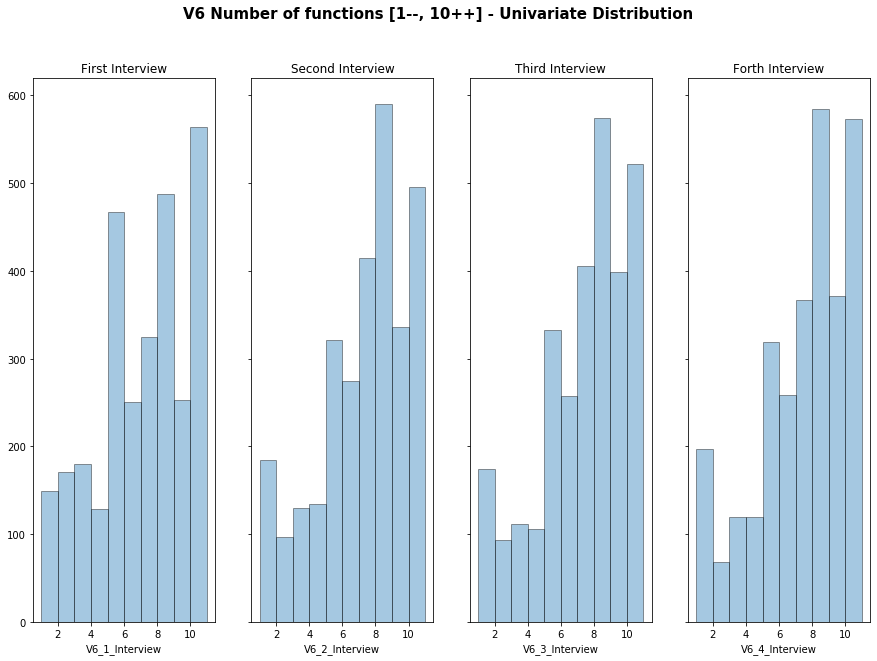

In [9]:
# V6 univariate distribution
fig, axs = plt.subplots(nrows=1, ncols=4, sharex=True,
                        sharey=True, figsize=(15, 10))
fig.suptitle('V6 Number of functions [1--, 10++] - Univariate Distribution',
             fontsize=15, fontweight='bold')
sns.distplot(Apps_clean['V6_1_Interview'], bins=np.arange(1, 12),
             hist_kws=dict(ec="k"), kde=False, ax=axs[0])
axs[0].set_title('First Interview')
sns.distplot(Apps_clean['V6_2_Interview'], bins=np.arange(1, 12),
             hist_kws=dict(ec="k"), kde=False, ax=axs[1])
axs[1].set_title('Second Interview')
sns.distplot(Apps_clean['V6_3_Interview'], bins=np.arange(1, 12),
             hist_kws=dict(ec="k"), kde=False, ax=axs[2])
axs[2].set_title('Third Interview')
sns.distplot(Apps_clean['V6_4_Interview'], bins=np.arange(1, 12),
             hist_kws=dict(ec="k"), kde=False, ax=axs[3])
axs[3].set_title('Forth Interview')
fig.subplots_adjust(hspace=0.8)
plt.show()


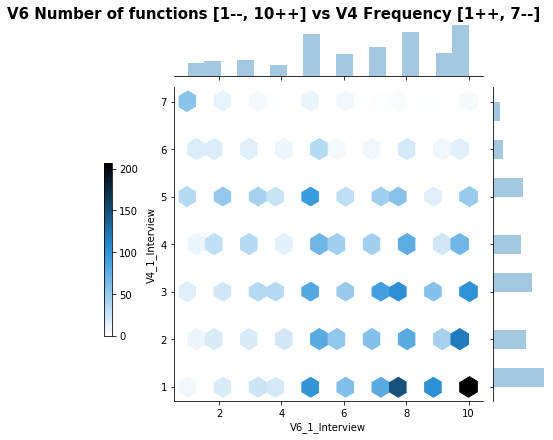

In [10]:
hexplot = sns.jointplot('V6_1_Interview', 'V4_1_Interview', data=Apps_clean,
                        kind='hex')
cbar_ax = hexplot.fig.add_axes([-.05, .25, .02, .4])  # x, y, width, height
plt.colorbar(cax=cbar_ax)
plt.title('V6 Number of functions [1--, 10++] vs V4 Frequency [1++, 7--] ',
          x=20, y=1.8, fontsize=15, fontweight='bold')
plt.show()


In [11]:
# create the model using statsmodels.api
model = stm.OLS(Apps_clean['V4_1_Interview'],
                stm.add_constant(Apps_clean['V6_1_Interview'])).fit()
print(model.summary())

# P-value and low R-squarred: the regression model has significant variables
# but explains little of the variability.
# The trend indicates that the predictor vairable still provides information
# about the response even though data points fall
# further from the regression line.


OLS Regression Results                            
Dep. Variable:         V4_1_Interview   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     436.7
Date:                Thu, 10 Oct 2019   Prob (F-statistic):           1.32e-90
Time:                        10:30:24   Log-Likelihood:                -5636.0
No. Observations:                2977   AIC:                         1.128e+04
Df Residuals:                    2975   BIC:                         1.129e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.5415      0.077     58.856      0.000       4.390  

 ### MODEL 4: Linear Regression between V4 and V10 extended functions

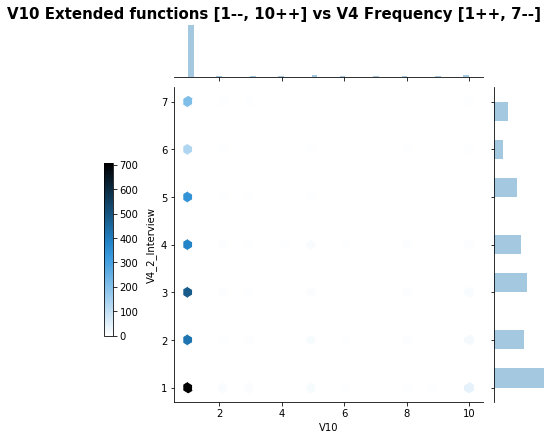

In [12]:
hexplot = sns.jointplot(Apps_clean['V10'], Apps_clean['V4_2_Interview'],
                        kind='hex')
cbar_ax = hexplot.fig.add_axes([-0.05, .25, .02, .4])  # x, y, width, height
plt.colorbar(cax=cbar_ax)
plt.title('V10 Extended functions [1--, 10++] vs V4 Frequency [1++, 7--] ',
          x=20, y=1.8, fontsize=15, fontweight='bold')
plt.show()


In [13]:
# it needs to be standardize otherwise not useful
# feature engineering binarize (always - not always)
pd.value_counts(Apps_clean['V10'])


1.0     2678
10.0      92
5.0       60
2.0       44
3.0       33
8.0       31
6.0       17
4.0        9
9.0        7
7.0        6
Name: V10, dtype: int64

 ### MODEL 5: Linear Regression between V4 and V11 cross app use [1--, 10++]

In [14]:
# feature engineering binarize (always - not always)
pd.value_counts(Apps_clean['V11'])


1.0     2293
5.0      129
8.0       95
10.0      92
2.0       91
3.0       85
6.0       65
7.0       56
4.0       49
9.0       22
Name: V11, dtype: int64

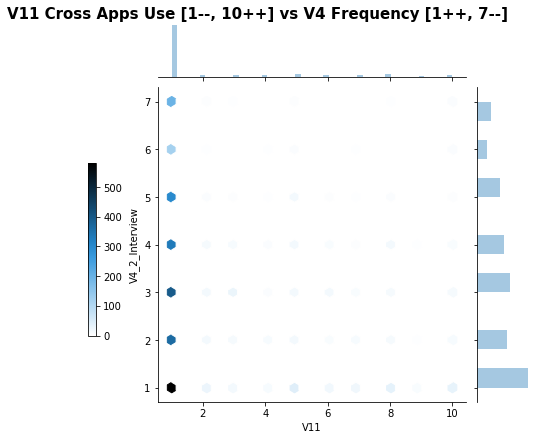

In [15]:
hexplot = sns.jointplot(Apps_clean['V11'], Apps_clean['V4_2_Interview'],
                        kind='hex')
cbar_ax = hexplot.fig.add_axes([-0.05, .25, .02, .4])  # x, y, width, height
plt.colorbar(cax=cbar_ax)
plt.title('V11 Cross Apps Use [1--, 10++] vs V4 Frequency [1++, 7--] ',
          x=20, y=1.8, fontsize=15, fontweight='bold')
plt.show()


 ### MODEL 6: Linear Regression between V4 and V12 Satisfaction [1--, 10++]

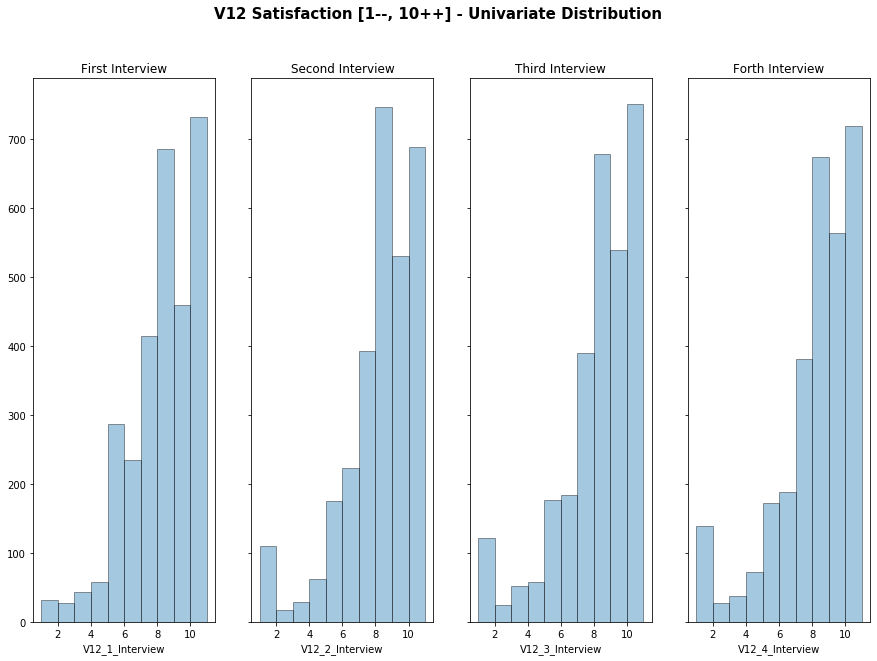

In [16]:
fig, axs = plt.subplots(nrows=1, ncols=4, sharex=True, 
                        sharey=True, figsize=(15, 10))
fig.suptitle('V12 Satisfaction [1--, 10++] - Univariate Distribution',
             fontsize=15, fontweight='bold')
sns.distplot(Apps_clean['V12_1_Interview'], bins=np.arange(1, 12),
             hist_kws=dict(ec="k"), kde=False, ax=axs[0])
axs[0].set_title('First Interview')
sns.distplot(Apps_clean['V12_2_Interview'], bins=np.arange(1, 12),
             hist_kws=dict(ec="k"), kde=False, ax=axs[1])
axs[1].set_title('Second Interview')
sns.distplot(Apps_clean['V12_3_Interview'], bins=np.arange(1, 12),
             hist_kws=dict(ec="k"), kde=False, ax=axs[2])
axs[2].set_title('Third Interview')
sns.distplot(Apps_clean['V12_4_Interview'], bins=np.arange(1, 12),
             hist_kws=dict(ec="k"), kde=False, ax=axs[3])
axs[3].set_title('Forth Interview')
fig.subplots_adjust(hspace=0.8)
plt.show()

# Distribution doesn't change much with the time


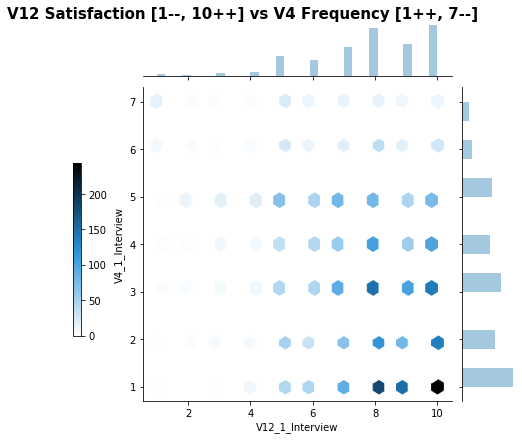

In [17]:
hexplot = sns.jointplot(Apps_clean['V12_1_Interview'],
                        Apps_clean['V4_1_Interview'], kind='hex')
cbar_ax = hexplot.fig.add_axes([-0.05, .25, .02, .4])  # x, y, width, height
plt.colorbar(cax=cbar_ax)
plt.title('V12 Satisfaction [1--, 10++] vs V4 Frequency [1++, 7--] ',
          x=20, y=1.8, fontsize=15, fontweight='bold')
plt.show()


In [18]:
# create the model using statsmodels.api
model = stm.OLS(Apps_clean['V4_1_Interview'],
                stm.add_constant(Apps_clean['V12_1_Interview'])).fit()
print(model.summary())


OLS Regression Results                            
Dep. Variable:         V4_1_Interview   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     236.5
Date:                Thu, 10 Oct 2019   Prob (F-statistic):           2.04e-51
Time:                        10:30:31   Log-Likelihood:                -5726.0
No. Observations:                2977   AIC:                         1.146e+04
Df Residuals:                    2975   BIC:                         1.147e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               4.8784      0.123     39.780      0.000       4.63

 ### MODEL 7: Linear Regression between V4 and V13 Future use [1--, 10++]

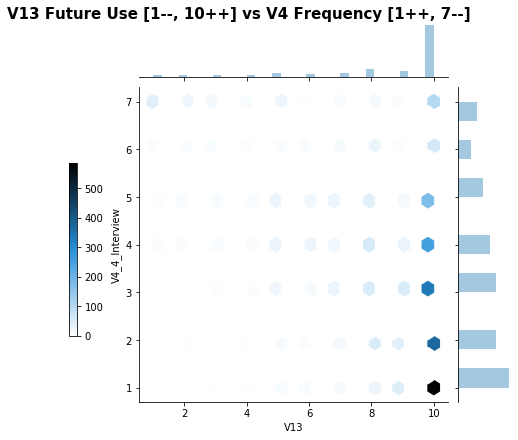

In [19]:
pd.value_counts(Apps_clean['V13'])
hexplot = sns.jointplot(Apps_clean['V13'], Apps_clean['V4_4_Interview'],
                        kind='hex')
cbar_ax = hexplot.fig.add_axes([-0.05, .25, .02, .4])  # x, y, width, height
plt.colorbar(cax=cbar_ax)
plt.title('V13 Future Use [1--, 10++] vs V4 Frequency [1++, 7--] ',
          x=20, y=1.8, fontsize=15, fontweight='bold')
plt.show()


In [20]:
# create the model using statsmodels.api
model = stm.OLS(Apps_clean['V4_1_Interview'],
                stm.add_constant(Apps_clean['V13'])).fit()
print(model.summary())

# is it relevant though? Aren't we measuring the same thing


OLS Regression Results                            
Dep. Variable:         V4_1_Interview   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     1123.
Date:                Thu, 10 Oct 2019   Prob (F-statistic):          3.46e-209
Time:                        10:30:33   Log-Likelihood:                -5363.1
No. Observations:                2977   AIC:                         1.073e+04
Df Residuals:                    2975   BIC:                         1.074e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3954      0.103     61.881      0.000       6.193       6.598
V

 ### MODEL 7: Linear Regression between V4 and V14 recommendation [1--,10++]

In [21]:
pd.value_counts(Apps_clean['V14'])


10.0    1098
8.0      412
5.0      338
1.0      253
7.0      225
9.0      223
6.0      172
3.0      101
2.0       86
4.0       69
Name: V14, dtype: int64

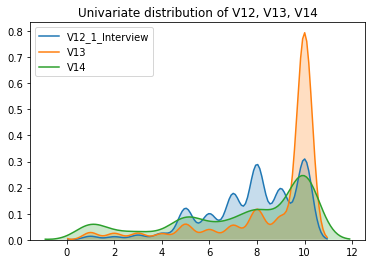

In [22]:
sns.kdeplot(Apps_clean['V12_1_Interview'], shade=True)
sns.kdeplot(Apps_clean['V13'], shade=True)
sns.kdeplot(Apps_clean['V14'], shade=True)
plt.title('Univariate distribution of V12, V13, V14')
plt.show()


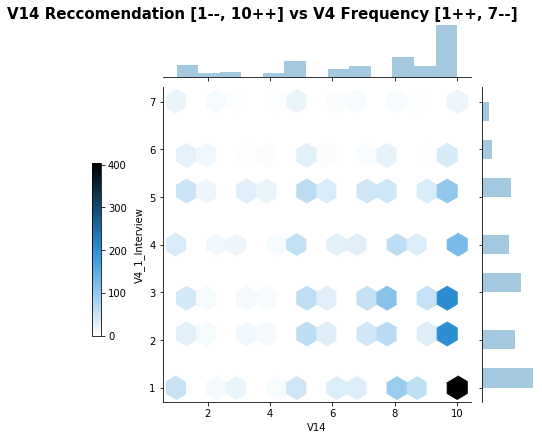

In [23]:
# So I expect the same behaviour of V12, V13, V14
# Joint probability distribution
hexplot = sns.jointplot(Apps_clean['V14'], Apps_clean['V4_1_Interview'],
                        kind='hex')
cbar_ax = hexplot.fig.add_axes([-0.05, .25, .02, .4])  # x, y, width, height
plt.colorbar(cax=cbar_ax)
plt.title('V14 Reccomendation [1--, 10++] vs V4 Frequency [1++, 7--] ',
          x=20, y=1.8, fontsize=15, fontweight='bold')
plt.show()


In [24]:
# create the model using statsmodels.api
model = stm.OLS(Apps_clean['V4_1_Interview'],
                stm.add_constant(Apps_clean['V14'])).fit()
print(model.summary())


OLS Regression Results                            
Dep. Variable:         V4_1_Interview   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     196.4
Date:                Thu, 10 Oct 2019   Prob (F-statistic):           2.87e-43
Time:                        10:30:35   Log-Likelihood:                -5744.7
No. Observations:                2977   AIC:                         1.149e+04
Df Residuals:                    2975   BIC:                         1.151e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1013      0.081     50.682      0.000       3.943       4.260
V

 ### CORRELATION MAP

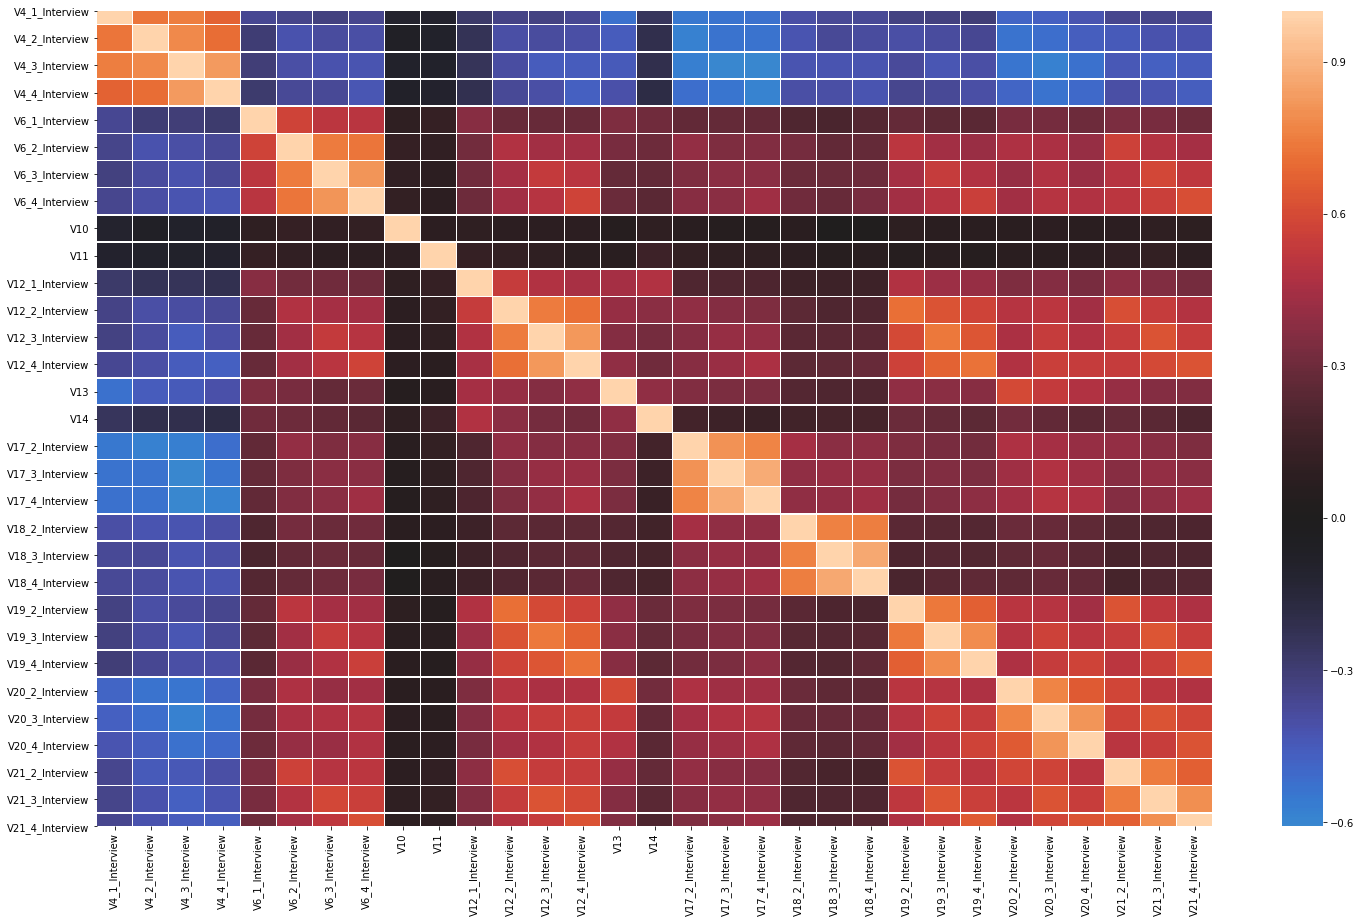

In [25]:
# index, identifiers and categorical variables
X = Apps_clean.drop(['Unnamed: 0', 'Probanden_ID__lfdn__AppNr',
                     'Probanden_ID__lfdn',
                     'Datum_1_Interview', 'Datum_2_Interview',
                     'Datum_3_Interview',
                     'Datum_4_Interview', 'V1', 'V01', 'V2', 'V3',
                     'Miss_row_%', 'Days_Between_2_and_1_Interview',
                     'Days_Between_3_and_2_Interview',
                     'Days_Between_4_and_3_Interview'], axis=1)
corr = X.corr()

fig, ax = plt.subplots(figsize=(25, 15))
sns.heatmap(corr, center=0, linewidths=0.5)
plt.show()

# V17, V18, V19, V20, V21
# Statistically different means (V18 weaker than other)
# expect the same behaviour


 ### MODEL 8: Multi variate statistics and mediation relationship

In [26]:
V2 = V2_enc.transform(Apps_clean['V2'].values.reshape(-1, 1)).toarray()
V3 = V3_enc.transform(Apps_clean['V3'].values.reshape(-1, 1)).toarray()

# STEP 2: V3 (y) --> V2
logit = stm.Logit(V3, stm.add_constant(V2)).fit()
print(logit.summary())


Optimization terminated successfully.
         Current function value: 0.206408
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 2977
Model:                          Logit   Df Residuals:                     2975
Method:                           MLE   Df Model:                            1
Date:                Thu, 10 Oct 2019   Pseudo R-squ.:                 0.01428
Time:                        10:30:37   Log-Likelihood:                -614.48
converged:                       True   LL-Null:                       -623.38
Covariance Type:            nonrobust   LLR p-value:                 2.443e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.2541      0.134    -24.317      0.000      -3.516      -2.992
x1             0.6975      0.

In [27]:
# STEP 2 (b): V2 (y) <-- V3
logit = stm.Logit(V2, stm.add_constant(V3)).fit()
print(logit.summary())


Optimization terminated successfully.
         Current function value: 0.689002
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 2977
Model:                          Logit   Df Residuals:                     2975
Method:                           MLE   Df Model:                            1
Date:                Thu, 10 Oct 2019   Pseudo R-squ.:                0.004322
Time:                        10:30:37   Log-Likelihood:                -2051.2
converged:                       True   LL-Null:                       -2060.1
Covariance Type:            nonrobust   LLR p-value:                 2.443e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1330      0.038     -3.521      0.000      -0.207      -0.059
x1             0.6975      0.

In [28]:
# STEP 3: V4 <--- V2, V3
X = np.hstack([V2, V3])

model = stm.OLS(Apps_clean['V4_1_Interview'], stm.add_constant(X)).fit()
print(model.summary())


OLS Regression Results                            
Dep. Variable:         V4_1_Interview   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     103.5
Date:                Thu, 10 Oct 2019   Prob (F-statistic):           3.39e-44
Time:                        10:30:37   Log-Likelihood:                -5739.7
No. Observations:                2977   AIC:                         1.149e+04
Df Residuals:                    2974   BIC:                         1.150e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4651      0.042     81.637      0.000       3.382       3.548
x

In [29]:
# Model V2, V4, V10

# STEP 1: V4 <--- V10
model = stm.OLS(Apps_clean['V4_1_Interview'],
                stm.add_constant(Apps_clean['V10'].\
                                 values.reshape(-1, 1))).fit()
print(model.summary())


OLS Regression Results                            
Dep. Variable:         V4_1_Interview   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     30.46
Date:                Thu, 10 Oct 2019   Prob (F-statistic):           3.71e-08
Time:                        10:30:37   Log-Likelihood:                -5824.7
No. Observations:                2977   AIC:                         1.165e+04
Df Residuals:                    2975   BIC:                         1.167e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1934      0.041     78.610      0.000       3.114       3.273
x

In [30]:
# STEP 2: V2 <--- V10
logit = stm.Logit(V2,
                  stm.add_constant(Apps_clean['V10'].\
                                   values.reshape(-1, 1))).fit()
print(logit.summary())


Optimization terminated successfully.
         Current function value: 0.689941
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 2977
Model:                          Logit   Df Residuals:                     2975
Method:                           MLE   Df Model:                            1
Date:                Thu, 10 Oct 2019   Pseudo R-squ.:                0.002965
Time:                        10:30:37   Log-Likelihood:                -2054.0
converged:                       True   LL-Null:                       -2060.1
Covariance Type:            nonrobust   LLR p-value:                 0.0004733
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2022      0.048     -4.235      0.000      -0.296      -0.109
x1             0.0692      0.

In [31]:
# STEP 3: V4 <--- V2, V10
del X
X = np.hstack([V2, Apps_clean['V10'].values.reshape(-1, 1)])
model = stm.OLS(Apps_clean['V4_1_Interview'], stm.add_constant(X)).fit()
print(model.summary())


OLS Regression Results                            
Dep. Variable:         V4_1_Interview   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     99.63
Date:                Thu, 10 Oct 2019   Prob (F-statistic):           1.31e-42
Time:                        10:30:37   Log-Likelihood:                -5743.3
No. Observations:                2977   AIC:                         1.149e+04
Df Residuals:                    2974   BIC:                         1.151e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5497      0.048     73.654      0.000       3.455       3.644
x

In [32]:
# STEP 4: V3 <--- V10
logit = stm.Logit(V3, stm.add_constant(Apps_clean['V10'].\
                  values.reshape(-1, 1))).fit()
print(logit.summary())


Optimization terminated successfully.
         Current function value: 0.192588
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 2977
Model:                          Logit   Df Residuals:                     2975
Method:                           MLE   Df Model:                            1
Date:                Thu, 10 Oct 2019   Pseudo R-squ.:                 0.08028
Time:                        10:30:37   Log-Likelihood:                -573.33
converged:                       True   LL-Null:                       -623.38
Covariance Type:            nonrobust   LLR p-value:                 1.453e-23
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.4724      0.111    -31.200      0.000      -3.691      -3.254
x1             0.2772      0.

In [33]:
# STEP 5: V4 <--- V2, V3, V10
del X
X = np.hstack([V2, V3, Apps_clean['V10'].values.reshape(-1, 1)])
model = stm.OLS(Apps_clean['V4_1_Interview'], stm.add_constant(X)).fit()
print(model.summary())


OLS Regression Results                            
Dep. Variable:         V4_1_Interview   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     73.68
Date:                Thu, 10 Oct 2019   Prob (F-statistic):           5.81e-46
Time:                        10:30:38   Log-Likelihood:                -5733.1
No. Observations:                2977   AIC:                         1.147e+04
Df Residuals:                    2973   BIC:                         1.150e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5472      0.048     73.837      0.000       3.453       3.641
x

In [34]:
# STEP 5: V4 <--- STEP 5 RESIDUALS, V17
del X
X = np.hstack([model.resid.values.reshape(-1, 1),
               Apps_clean['V17_2_Interview'].values.reshape(-1, 1)])
model = stm.OLS(Apps_clean['V4_1_Interview'], stm.add_constant(X)).fit()
print(model.summary())


OLS Regression Results                            
Dep. Variable:         V4_1_Interview   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                 2.146e+04
Date:                Thu, 10 Oct 2019   Prob (F-statistic):               0.00
Time:                        10:30:38   Log-Likelihood:                -1766.5
No. Observations:                2977   AIC:                             3539.
Df Residuals:                    2974   BIC:                             3557.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3087      0.020    167.014      0.000       3.270       3.348
x

In [35]:
# Principal component analysis
# TODO
